In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import os
import seaborn as sns
%matplotlib inline

import pywt
import scipy
from scipy import signal
from scipy.signal import butter, deconvolve



import tensorflow as tf
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Bad key "text.kerning_factor" on line 4 in
C:\Users\Ayman\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
test_path = os.path.join('data','test.csv')
train_path = os.path.join('data','train.csv')

test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)

In [3]:
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise_signal(x, wavelet='db4', level=1):
    coeff = pywt.wavedec(x, wavelet, mode="per")
    sigma = (1/0.6745) * maddest(coeff[-level])

    uthresh = sigma * np.sqrt(2*np.log(len(x)))
    coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

    return pywt.waverec(coeff, wavelet, mode='per')

In [4]:
time_train = train_df.time
signal_train_denoised = denoise_signal(train_df.signal)
open_channels_train = train_df.open_channels

data = {
    'time': time_train,
    'signal_denoised': signal_train_denoised,
    'open_channels_train': open_channels_train
       }

train_data = pd.DataFrame(data=data)

In [5]:
from sklearn.model_selection import train_test_split

X = train_data[['time','signal_denoised']]
y = train_data.open_channels_train.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

C:\Users\Ayman\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [6]:
X_test_scaled.shape

(1000000, 2)

In [7]:
import tensorflow as tf
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



def deep_learning_model(inputs=2, epochs=10, outputs=11, activation='relu'):
    
    model = Sequential()
    model.add(Dense(units=100, activation=activation, input_dim=inputs))
    model.add(Dense(units=200, activation=activation))
    model.add(Dropout(.1))
    model.add(Dense(units=outputs, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy',tf.keras.metrics.AUC()])


#     print(model.summary())
    
#     model.fit(
#         X_train_scaled,
#         y_train_categorical,
#         epochs=epochs,
#         batch_size = 200,
#         shuffle=True,
#         verbose=2
#     )
    return model

deep_learning_model(inputs=2, epochs=10, outputs=11, activation=tf.nn.leaky_relu).summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                2211      
Total params: 22,711
Trainable params: 22,711
Non-trainable params: 0
_________________________________________________________________


In [11]:
model = deep_learning_model(inputs=2,outputs=11, activation=tf.nn.leaky_relu).fit(
        X_train_scaled,
        y_train_categorical,
        epochs=50,
        batch_size = 200,
        shuffle=True,
        verbose=1
    )
model


Epoch 1/50
20000/20000 [==============================] - 90s 4ms/step - loss: 1.0770 - accuracy: 0.5539 - auc_2: 0.9376
Epoch 2/50
20000/20000 [==============================] - 89s 4ms/step - loss: 0.8804 - accuracy: 0.6129 - auc_2: 0.9588
Epoch 3/50
20000/20000 [==============================] - 101s 5ms/step - loss: 0.8529 - accuracy: 0.6210 - auc_2: 0.9610
Epoch 4/50
20000/20000 [==============================] - 88s 4ms/step - loss: 0.8362 - accuracy: 0.6269 - auc_2: 0.9623
Epoch 5/50
20000/20000 [==============================] - 92s 5ms/step - loss: 0.8242 - accuracy: 0.6312 - auc_2: 0.9633
Epoch 6/50
20000/20000 [==============================] - 87s 4ms/step - loss: 0.8139 - accuracy: 0.6350 - auc_2: 0.9641
Epoch 7/50
20000/20000 [==============================] - 91s 5ms/step - loss: 0.8077 - accuracy: 0.6374 - auc_2: 0.9646
Epoch 8/50
20000/20000 [==============================] - 89s 4ms/step - loss: 0.8018 - accuracy: 0.6394 - auc_2: 0.9651
Epoch 9/50
20000/20000 [=======

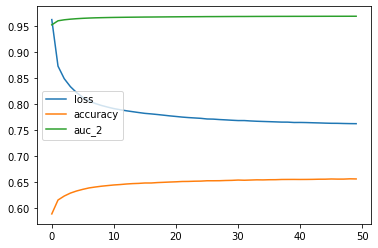

In [12]:
pd.DataFrame(model.history).plot()